In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [3]:
import ast
generic = lambda x: ast.literal_eval(x)
conv = {'labels': generic,}
df = pd.read_csv('data/image_data.csv', converters = conv)
df.head()


,filename,x0,y0,x1,y1,labels,num_digits,x_increase,y_increase,image_height,image_width
0,data/extra/1.png,8,7,141,141,"[4.0, 7.0, 8.0]",3,15.30,15.45,141,166
1,data/extra/10000.png,3,5,45,38,"[2.0, 10.0, 10.0]",3,4.95,3.90,44,55
2,data/extra/100001.png,3,0,32,21,"[2.0, 6.0, 4.0]",3,3.30,2.40,26,42
3,data/extra/100004.png,5,18,72,70,"[1.0, 6.0, 10.0]",3,7.80,6.00,89,97
4,data/extra/100005.png,-6,0,156,90,"[1.0, 1.0, 4.0, 3.0]",4,18.90,10.50,86,181


In [4]:
from scipy.ndimage import imread
from scipy.misc import imresize

def get_new_loc(start,end,org_shape, img_size):
    if org_shape < img_size:
        return 0,org_shape
    middle = start + (end-start)/2
    halve_img_size = img_size/2
    start, end = int(middle-halve_img_size+0.49),int(middle+halve_img_size-.49)  
    if start < 0:
        return 0,img_size
    if end > org_shape:
        return org_shape-224,org_shape
    assert end-start <= 224
    return start, end
    
def crop_and_resize(image, img_size):
    """ Crop and resize an image
    """
    image_data = imread(image['filename'])
    y_start,y_end = get_new_loc(image['y0'],image['y1'], image_data.shape[0], img_size[0])
    x_start,x_end = get_new_loc(image['x0'],image['x1'], image_data.shape[1], img_size[1])
    crop = image_data[y_start:y_end, x_start:x_end, :]
    return imresize(crop, img_size)

def create_dataset(df, img_size):
    """ Helper function for converting images into a numpy array
    """
    # Initialize the numpy arrays (0's are stored as 10's)
    X = np.zeros(shape=(df.shape[0], img_size[0], img_size[0], 3), dtype='uint8')
    y = np.full((df.shape[0], 5), 10, dtype=int)

    
    # Iterate over all images in the pandas dataframe (slow!)
    for i, (index, image) in enumerate(df.iterrows()):
        
        # Get the image data
        X[i] = crop_and_resize(image, img_size)
        
        # Get the label list as an array
        labels = np.array((image['labels']))
                
        # Store 0's as 0 (not 10)
        labels[labels==10] = 0
        # Embed labels into label array
        y[i,0:labels.shape[0]] = labels
        
        if i%1000== 999:
            print(i,df.shape[0])
    # Return data and labels   
    return X, y


# Change this to select a different image size
image_size = (224, 224)

# Get cropped images and labels (this might take a while...)
# X_train, y_train = create_dataset(df[df.filename.str.contains('train')], image_size)
# plot_images(X_train, 3, 6, y_train)
X_test, y_test = create_dataset(df[df.filename.str.contains('extra')], image_size)
X_test.shape

/home/tako/devtools/test_env/env-ai-37/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/home/tako/devtools/test_env/env-ai-37/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


999 56365
1999 56365
2999 56365
3999 56365
4999 56365
5999 56365
6999 56365
7999 56365
8999 56365
9999 56365
10999 56365
11999 56365
12999 56365
13999 56365
14999 56365
15999 56365
16999 56365
17999 56365
18999 56365
19999 56365
20999 56365
21999 56365
22999 56365
23999 56365
24999 56365
25999 56365
26999 56365
27999 56365
28999 56365
29999 56365
30999 56365
31999 56365
32999 56365
33999 56365
34999 56365
35999 56365
36999 56365
37999 56365
38999 56365
39999 56365
40999 56365
41999 56365
42999 56365
43999 56365
44999 56365
45999 56365
46999 56365
47999 56365
48999 56365
49999 56365
50999 56365
51999 56365
52999 56365
53999 56365
54999 56365
55999 56365


(56365, 224, 224, 3)

In [5]:
df.head()

,filename,x0,y0,x1,y1,labels,num_digits,x_increase,y_increase,image_height,image_width
0,data/extra/1.png,8,7,141,141,"[4.0, 7.0, 8.0]",3,15.30,15.45,141,166
1,data/extra/10000.png,3,5,45,38,"[2.0, 10.0, 10.0]",3,4.95,3.90,44,55
2,data/extra/100001.png,3,0,32,21,"[2.0, 6.0, 4.0]",3,3.30,2.40,26,42
3,data/extra/100004.png,5,18,72,70,"[1.0, 6.0, 10.0]",3,7.80,6.00,89,97
4,data/extra/100005.png,-6,0,156,90,"[1.0, 1.0, 4.0, 3.0]",4,18.90,10.50,86,181


In [6]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Helper function for plotting nrows * ncols images
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flat): 
        # Pretty string with actual label
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        if cls_pred is None:
            title = "True: {0}".format(true_number)
        else:
            # Pretty string with predicted label
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "True: {0}, Pred: {1}".format(true_number, pred_number)
        ax.imshow(images[i])
        ax.set_title(title)
        ax.set_xticks([]); ax.set_yticks([])

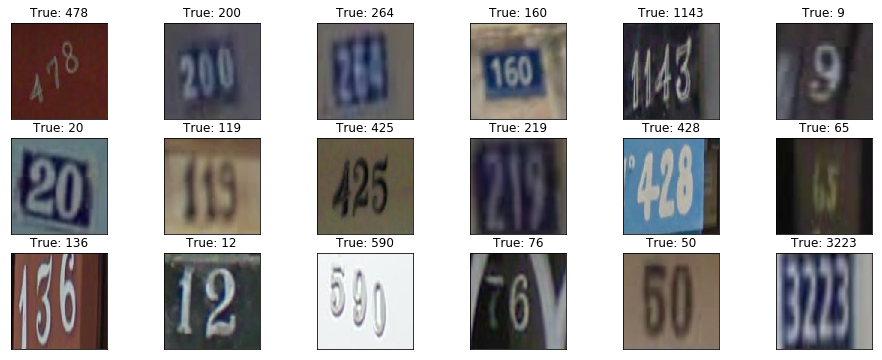

In [7]:
# Display images from the training set
plot_images(X_test, 3, 6, y_test);

In [8]:
def labelize(num_array):
    ret_str = ''
    for i in num_array:
        if i == 10:
            ret_str = ret_str + 'x'
        else: 
            ret_str = ret_str + str(i)
    return ret_str

# !mkdir newdata_224
# !mkdir newdata_224/test
# !mkdir newdata_224/train
# !mkdir newdata_224/val
!mkdir newdata_224/extra

OSError: [Errno 12] Cannot allocate memory

In [9]:
for i,o in enumerate(X_test):
    aImage = Image.fromarray(o)
    aImage.save('newdata_224/extra/image' + str(i) + '_' + labelize(y_test[i]) + '.png')
    if i%1000==999:
        print(i,X_test.shape[0])

999 56365
1999 56365
2999 56365
3999 56365
4999 56365
5999 56365
6999 56365
7999 56365
8999 56365
9999 56365
10999 56365
11999 56365
12999 56365
13999 56365
14999 56365
15999 56365
16999 56365
17999 56365
18999 56365
19999 56365
20999 56365
21999 56365
22999 56365
23999 56365
24999 56365
25999 56365
26999 56365
27999 56365
28999 56365
29999 56365
30999 56365
31999 56365
32999 56365
33999 56365
34999 56365
35999 56365
36999 56365
37999 56365
38999 56365
39999 56365
40999 56365
41999 56365
42999 56365
43999 56365
44999 56365
45999 56365
46999 56365
47999 56365
48999 56365
49999 56365
50999 56365
51999 56365
52999 56365
53999 56365
54999 56365
55999 56365


In [33]:
num_val = 0 
for i,o in enumerate(X_train):
    aImage = Image.fromarray(o)
    if np.random.rand() > 0.95 and num_val <4001:
        aImage.save('newdata_224/val/image' + str(i) + '_' + labelize(y_train[i]) + '.png')
        num_val +=1
    else:
        aImage.save('newdata_224/train/image' + str(i) + '_' + labelize(y_train[i]) + '.png')
    if i%1000==999:
        print(i,X_test.shape[0])


999 33401 40
1999 33401 78
2999 33401 134
3999 33401 173
4999 33401 228
5999 33401 270
6999 33401 323
7999 33401 377
8999 33401 435
9999 33401 489
10999 33401 538
11999 33401 602
12999 33401 658
13999 33401 707
14999 33401 759
15999 33401 807
16999 33401 864
17999 33401 904
18999 33401 964
19999 33401 1019
20999 33401 1062
21999 33401 1101
22999 33401 1168
23999 33401 1223
24999 33401 1276
25999 33401 1330
26999 33401 1392
27999 33401 1438
28999 33401 1498
29999 33401 1557
30999 33401 1609
31999 33401 1651
32999 33401 1712
